________________________________________________________________________________
**Import required libraries and modules**
________________________________________________________________________________

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

________________________________________________________________________________
**Read the data**
________________________________________________________________________________

In [294]:
data = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [295]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


________________________________________________________________________________
**Preprocessing the dataset**
________________________________________________________________________________

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [297]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [298]:
data.apply(lambda x: len(x.unique()))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

________________________________________________________________________________
**Checking the presence of missing and null values**
________________________________________________________________________________

In [299]:
missing_values = data.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

________________________________________________________________________________
**Exploratory Data Analysis**
________________________________________________________________________________

Let's check the general information about the survivors. As we can see below, if you are of the female sex, then the chances of surviving are strongly increased.

In [300]:
men = data.loc[data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [301]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


**Check for outliers in columns that include object type variables.**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


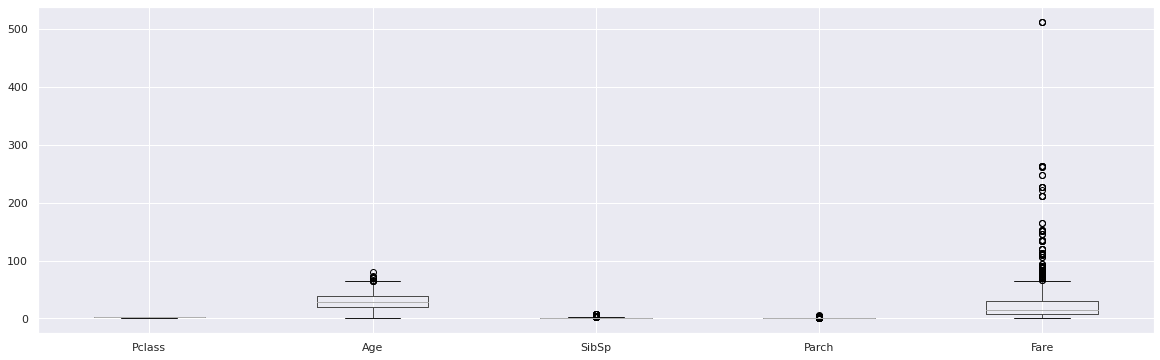

In [302]:
data.boxplot(column= ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],figsize=(20,6))

**We can check procent of missing variables in Cabin, Age and Embarked columns. Definitely we will have to fix these problems in data.**

In [303]:
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [304]:
print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [305]:
print('Percent of missing "Embarked" records is %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


**We can see below the density of the Titanic passenger age.**

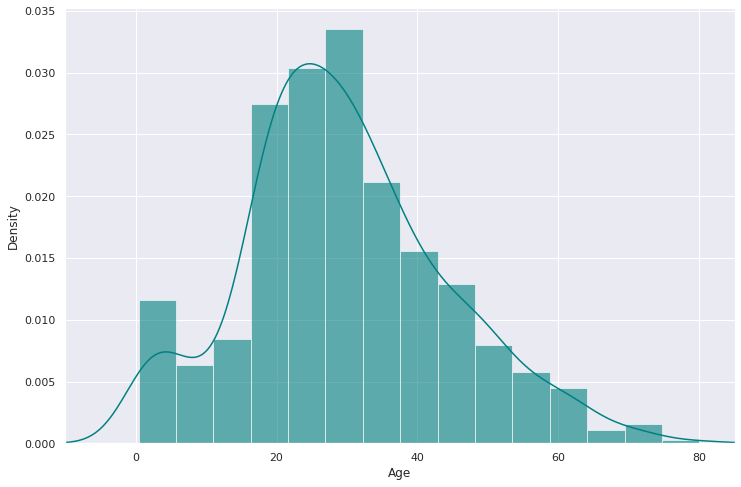

In [306]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal', figsize=(12,8))
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

**The same view of survival by age, but with smoother visualization.**

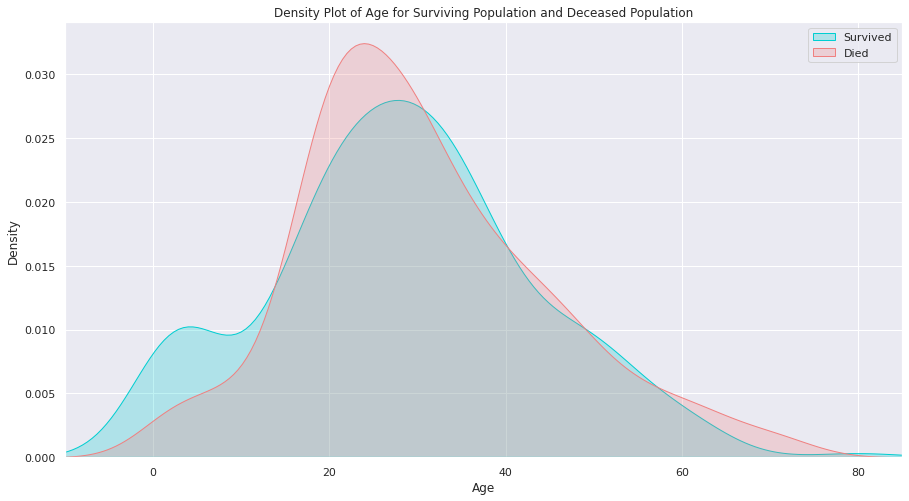

In [307]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Age"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Age"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

**We can check all the Ports of Embarkation. The most used download port was Southampton. This port probably has the lowest survival rate**

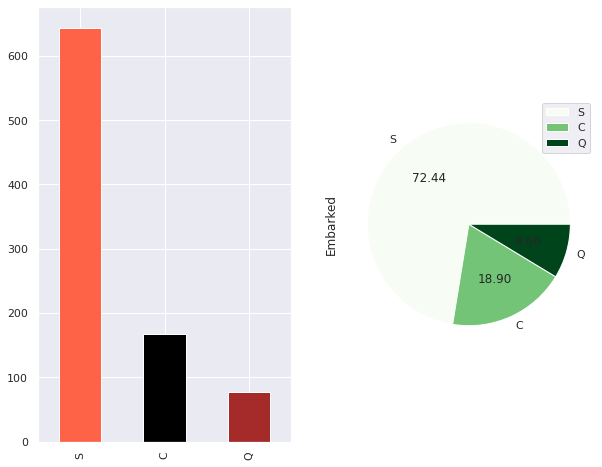

In [308]:
fig,axes = plt.subplots(1,2,figsize=(10,8))
data["Embarked"].value_counts().plot(kind="bar", ax=axes[0],color =['tomato','black','brown'])
data["Embarked"].value_counts().plot(kind="pie",ax=axes[1],autopct='%0.2f', colormap="Greens")
plt.legend()
plt.show()

**Logic tells us that Port of Embarkation has no effect on survivability, but it helps in visualizing distribution of one variable as well as the relationship between multiple variables separately.**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


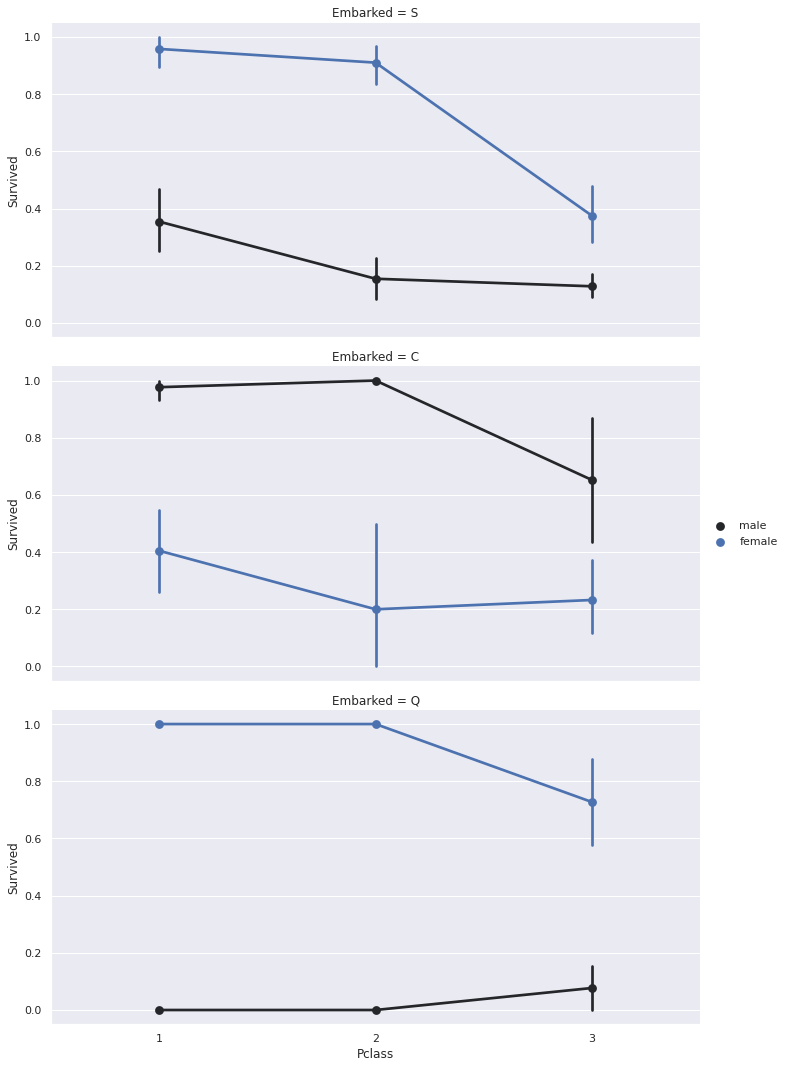

In [309]:
grid = sns.FacetGrid(data, row='Embarked', size=5, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex')
sns.color_palette("light:#5A9", as_cmap=True)
grid.add_legend()

**We can see visual proportion on 2 plots below Survived by Sex. Draw conclusions.**

<Figure size 576x576 with 0 Axes>

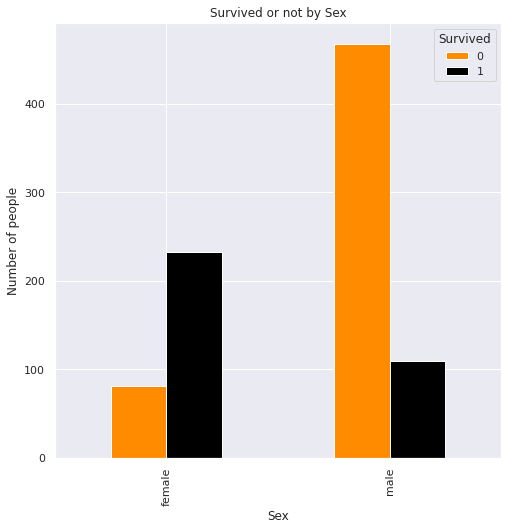

<Figure size 576x576 with 0 Axes>

In [310]:
my_colors = 'darkorange', 'black'
from numpy.core.fromnumeric import size
%matplotlib inline
pd.crosstab(data.Sex,data.Survived).plot(kind='bar', color=my_colors, figsize=(8,8))
plt.title('Survived or not by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.figure(figsize=(8,8))

Text(0, 0.5, 'Proportion')

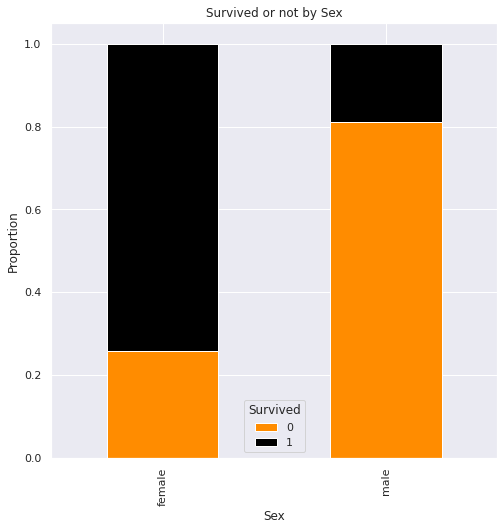

In [311]:
from IPython.core.pylabtools import figsize
table=pd.crosstab(data.Sex,data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=my_colors, figsize=(8,8))
plt.title('Survived or not by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')

**We can see below the correlation between variables and and the ability to survive**

In [312]:
pd.pivot_table(data, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


**A very strong influence on survival was influenced by the class. First class women were the most likely to survive**

In [313]:
data.pivot_table("Survived",index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**If we take into account that logically the fare was depending on the passenger class the fare on the Titanic indirectly affects survival.**

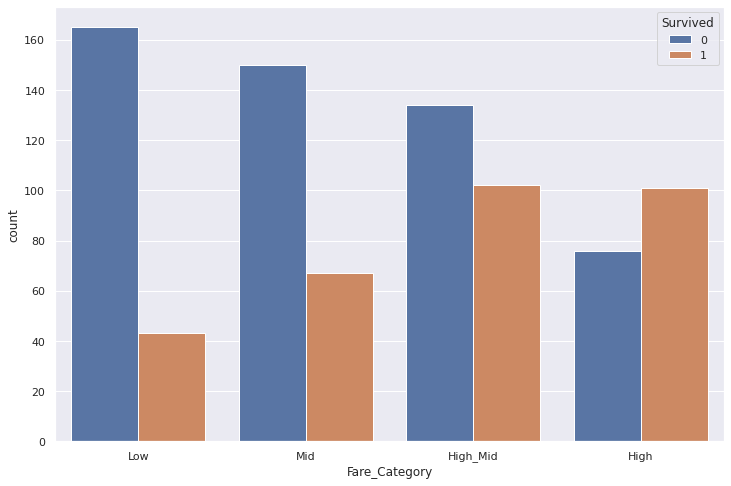

In [314]:
data1=data.copy()
data1['Fare_Category'] = pd.cut(data1['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='Fare_Category', hue = 'Survived', data=data1)
plt.show()

**Let's separate numeric and categoric columns and see Correlation between numeric variables**

In [341]:
data_copy = data.copy()

In [315]:
df_num = data[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

Correlation between variables: 


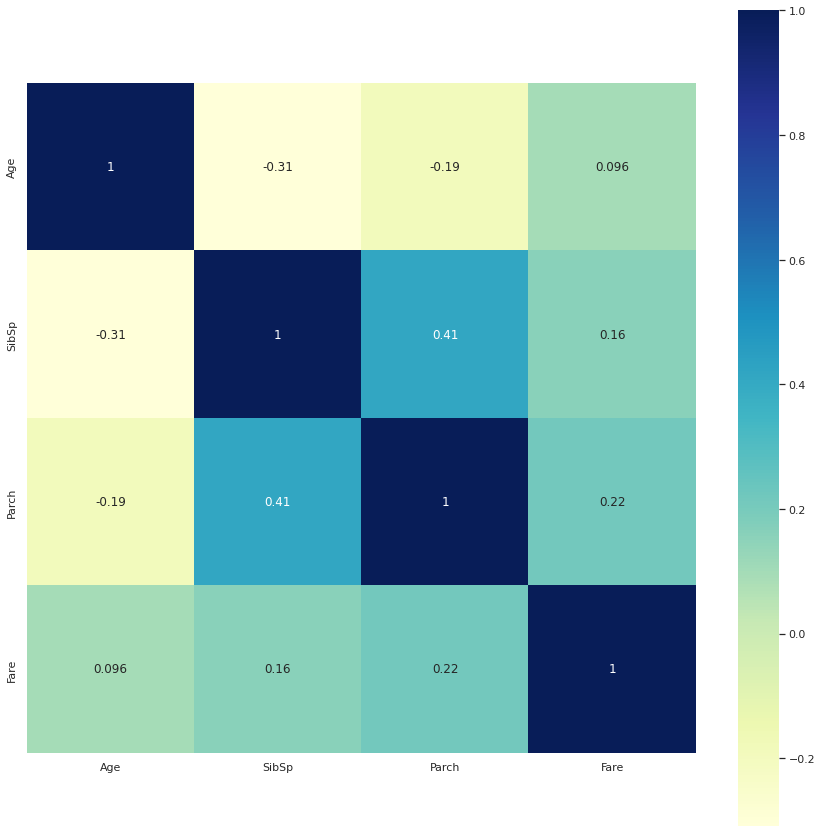

In [316]:
print("Correlation between variables: ")
corr=df_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu",square=True)

________________________________________________________________________________
**After visualizing the data, we start working on preparing it for algorithms**
________________________________________________________________________________

We decided to drop unnecessary columns such as "Ticket" and "Cabin" because the ticket column is, in our opinion, a less important variable, and in the cabin with 77.10% of missing entries, it cannot give us adequate information. The name can affect survival only in isolated cases. Passanger ID also has no affect on anything in this case.


We still have an unresolved issue with missing values ​​in data. There are many ways how to deal with that. We will use the most common method, the average value(mean). We always can come back and use another way.

In [317]:
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

In [318]:
data = clean(data)
test = clean(test)

**Preprocesing data**

In [319]:
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
      
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


________________________________________________________________________________
1. **Spliting the Dataset into Training and Testing**
2. **Training**
3. **Check models and algorithm scores**
________________________________________________________________________________

**Apply the Logistic regression**

In [371]:
y = data["Survived"]
X = data.drop("Survived", axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predictions = clf.predict(X_val)
accuracy_score(y_val, predictions)
clf_score=clf.score(X , y)
print("The Logistic regression model accuracy is {}".format(clf_score))

The Logistic regression model accuracy is 0.8024691358024691


**Apply the Random forest model**

In [373]:
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X, y)
test_pred = rfcl.predict(X)
rfcl_score=rfcl.score(X , y)
print("The Random forest model accuracy is {}".format(rfcl_score))

The Random forest model accuracy is 0.8451178451178452


**Apply Adaboost Ensemble Algorithm**

In [374]:
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X)
abcl_score=abcl.score(X, y)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))

The Adaboost Ensemble model accuracy is 0.8215488215488216


**Apply Bagging Classifier Algorithm**

In [376]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X)
bgcl_score=bgcl.score(X, y)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))

The Bagging classifier model accuracy is 0.920314253647587


**Apply GradientBoost Classifier Algorithm**

In [382]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X)
gbcl_score=gbcl.score(X, y)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Gradient Boost classifier model accuracy is 0.8417508417508418


**Check all scores**

In [381]:
print("The Logistic regression model accuracy is {}".format(clf_score))
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Logistic regression model accuracy is 0.8024691358024691
The Random forest model accuracy is 0.8451178451178452
The Adaboost Ensemble model accuracy is 0.8215488215488216
The Bagging classifier model accuracy is 0.920314253647587
The Gradient Boost classifier model accuracy is 0.8417508417508418
